# Here I perform an Abel deprojection on the surface brightness profile to calculate density as a function of radius

I take the mass to light ratio and total mass from Ruiz Lara's 2012.07863v1 Table 1.

Leo I's brightness profile is taken from SDSS.

Instead of dealing with magnitude convertions I set the scale to match the total mass.

Text(0, 0.5, 'Luminosity')

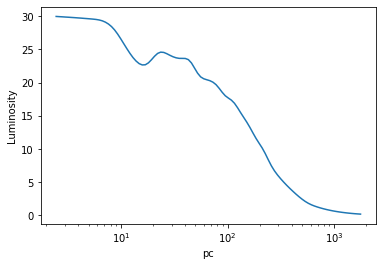

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as spl

arcsec,fl = np.loadtxt("extsbLeoI.tab").T #reading in Leo I's brightness profile from SDSS
parsec = arcsec*1.25 #converting arseconds to parsecs at Leo I's distance
mass_to_light = 4.4 
scaling_constant = 530*5.5e6 #scaling constant to known total stellar mass, adjusted after numerical integral in later cells 
fl = scaling_constant*mass_to_light*10**(-0.4*fl) #convert mag to flux
fl_spl = spl(parsec,fl) #flux spline
plt.semilogx(parsec, fl_spl(parsec))
plt.xlabel('pc')
plt.ylabel('Luminosity')


Text(0, 0.5, '$M_\\odot/pc^3$')

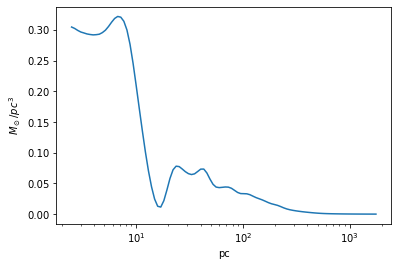

In [32]:
# Abel deprojection https://academic.oup.com/mnras/article/401/4/2433/1127116 appendix A
fl_spl_d = fl_spl.derivative()
deprojected_mass = np.zeros_like(parsec)
for (i,w) in enumerate(parsec):
    s = 0.0
    for (w2,dR) in zip(parsec[i+1:],np.diff(parsec[i:])):
        s += fl_spl_d(w2)/np.sqrt(w2**2-w**2)*dR
    s *= -1/np.pi
    deprojected_mass[i] = s
plt.semilogx(parsec,deprojected_mass)
plt.xlabel('pc')
plt.ylabel(r'$M_\odot/pc^3$')

# want enclosed mass to be 5.5*10^6 Msun

In [45]:
#Integrating total mass to scale the initial constant.
total_mass = np.sum( deprojected_mass[:-1] * 4*np.pi*parsec[:-1]**2 * np.diff(parsec) )
total_mass

5542818.784286523

Typical globular clusters have mass density of 70 [M_sun/pc^3] and 0.4 [stars/pc^3] (https://en.wikipedia.org/wiki/Stellar_density)
Assuming Leo I and globular clusters have stars of similar mass, then 0.3 [M_sun/pc^3]/70[M_sun/pc^3]*0.4[stars/pc^3] = 0.002[M_sun/pc^3]

In [40]:
0.14/(0.3/70*0.4)

81.66666666666667